In [ ]:
pip install -U scikit-learn==0.23.2

     |████████████████████████████████| 6.8MB 3.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import numpy as np
import pandas as pd
import pickle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
#data cleaning
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


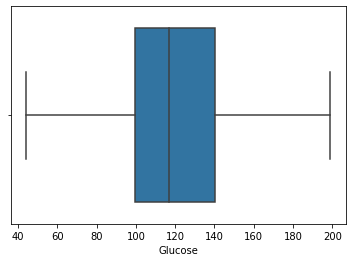

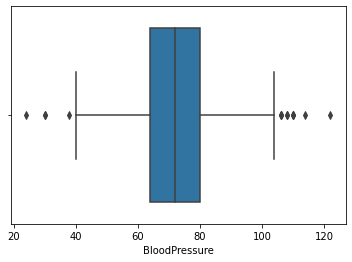

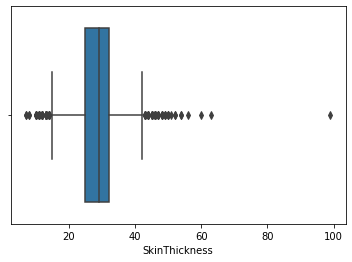

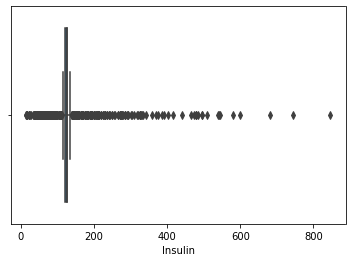

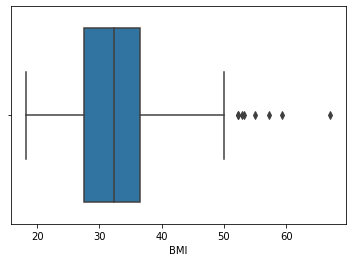

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Glucose'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['SkinThickness'])
plt.show()
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BMI'])
plt.show()

In [ ]:
df['Glucose'].fillna(df['Glucose'].mean(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


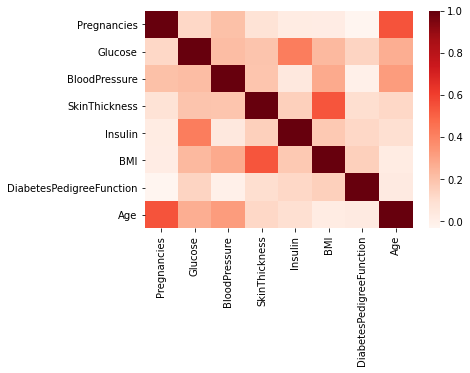

In [ ]:
features=df.iloc[:,:-1]
sns.heatmap(features.corr(),cmap="Reds",annot=False)
plt.show()

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
model=RandomForestClassifier(n_estimators=20,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


act_pred_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
act_pred_df.head()

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7792207792207793


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[93 14]
 [20 27]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       107
           1       0.66      0.57      0.61        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



In [ ]:
#tuning the hyper parameters for better performance using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [5,10,15,20,25,30],
    'max_features': [2,4,6],
    'max_depth': [2,5,8,12,15,20]
}



In [ ]:
grid_model = GridSearchCV(model,param_grid,cv=10)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=20, random_state=0),
             param_grid={'max_depth': [2, 5, 8, 12, 15, 20],
                         'max_features': [2, 4, 6],
                         'n_estimators': [5, 10, 15, 20, 25, 30]})

In [ ]:
grid_model.best_params_

{'max_depth': 8, 'max_features': 6, 'n_estimators': 20}

In [ ]:
#training model with new hyper parameters
n_model=RandomForestClassifier(n_estimators=20,max_depth=8,max_features=6)
n_model.fit(X_train,y_train)
y_pred=n_model.predict(X_test)


act_pred_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
act_pred_df.head()

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8116883116883117


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       107
           1       0.67      0.74      0.71        47

    accuracy                           0.81       154
   macro avg       0.78      0.79      0.78       154
weighted avg       0.82      0.81      0.81       154



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[90 17]
 [12 35]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 5)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]

#random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth
              }

print(random_grid)

{'n_estimators': [5, 28, 52, 76, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 23, 45]}


In [ ]:
r_model = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42)

r_model.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=52, max_features=sqrt, max_depth=45 ................
[CV] . n_estimators=52, max_features=sqrt, max_depth=45, total=   0.1s
[CV] n_estimators=52, max_features=sqrt, max_depth=45 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] . n_estimators=52, max_features=sqrt, max_depth=45, total=   0.1s
[CV] n_estimators=52, max_features=sqrt, max_depth=45 ................
[CV] . n_estimators=52, max_features=sqrt, max_depth=45, total=   0.1s
[CV] n_estimators=52, max_features=sqrt, max_depth=45 ................
[CV] . n_estimators=52, max_features=sqrt, max_depth=45, total=   0.1s
[CV] n_estimators=52, max_features=sqrt, max_depth=45 ................
[CV] . n_estimators=52, max_features=sqrt, max_depth=45, total=   0.1s
[CV] n_estimators=52, max_features=sqrt, max_depth=45 ................
[CV] . n_estimators=52, max_features=sqrt, max_depth=45, total=   0.1s
[CV] n_estimators=52, max_features=sqrt, max_depth=45 ................
[CV] . n_estimators=52, max_features=sqrt, max_depth=45, total=   0.1s
[CV] n_estimators=52, max_features=sqrt, max_depth=45 ................
[CV] . n_estimators=52, max_features=sqrt, max_depth=45, total=   0.1s
[CV] n_estimators=52, max_features=sqrt, max_depth=45 ................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.4s finished


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_estimators=20,
                                                    random_state=0),
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [5, 28, 52, 76, 100]},
                   random_state=42, verbose=2)

In [ ]:
r_model.best_params_

{'max_depth': 45, 'max_features': 'auto', 'n_estimators': 76}

In [ ]:
#training model with new hyper parameters
r_model=RandomForestClassifier(n_estimators=76,max_depth=45,max_features='auto')
r_model.fit(X_train,y_train)
y_pred=r_model.predict(X_test)


act_pred_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
act_pred_df.head()

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7987012987012987


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       107
           1       0.67      0.66      0.67        47

    accuracy                           0.80       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.80      0.80      0.80       154



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[92 15]
 [16 31]]


In [ ]:
pickle.dump(n_model,open('dia_model.pkl','wb'))